# Cascade Cup Challenge - IIT Guwahati

#### Team Members:
    Nithish Kumar B
    Rakesh A

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
import pandas as pd
cascade = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/cascade/train_age_dataset.csv')


In [ ]:
cascade.shape

(488877, 27)

In [4]:
data = cascade.copy()

In [5]:
data.drop_duplicates(keep='first')

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000,1
1,405231,51100441,2,2,0.000000,0.000,0.00,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000,2
2,57867,6887426,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000,1
3,272618,50742404,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000,1
4,251123,45589200,2,2,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,535266,38983571,2,2,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.300000,0.422837,8.714286,56.783167,0,0.008000,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,195.000000,1
488873,36706,53264639,1,1,0.017241,0.000,0.00,0,0.0,0.0,0.000000,0.012195,0.668494,35.662921,69.031216,2,0.051724,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,188.742857,4
488874,31570,44693578,1,1,0.229508,1.625,2.25,0,0.0,0.0,0.000000,0.094340,0.579213,13.444444,50.611380,0,0.016393,0.409836,0.000000,0.000000,0.118033,0.000000,0.049180,0.237705,0.303279,184.880000,4
488875,239209,42760145,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.221303,9.578947,131.188182,0,0.000000,0.113821,0.000000,0.000000,0.030894,0.000000,0.024390,0.130081,0.000000,0.000000,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [8]:
data.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,271605.981815,4.236096e+07,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,156808.138002,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,0.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135779.000000,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271560.000000,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,407431.000000,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,543196.000000,7.904203e+07,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [9]:
data.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [11]:
for i in data.columns:
    u = data[i].unique()
    if(len(u)<50) and (data[i].dtypes=="int64"):
        print(i,"seem to category but it was in an integer")

tier seem to category but it was in an integer
gender seem to category but it was in an integer
age_group seem to category but it was in an integer


In [12]:
data["tier"]=data["tier"].astype(str)
data["gender"]=data["gender"].astype(str)
data["age_group"]=data["age_group"].astype(str)

# Feature selection

In [13]:
df = data.drop(['userId','Unnamed: 0'],axis = 1)

feature selection by correlation

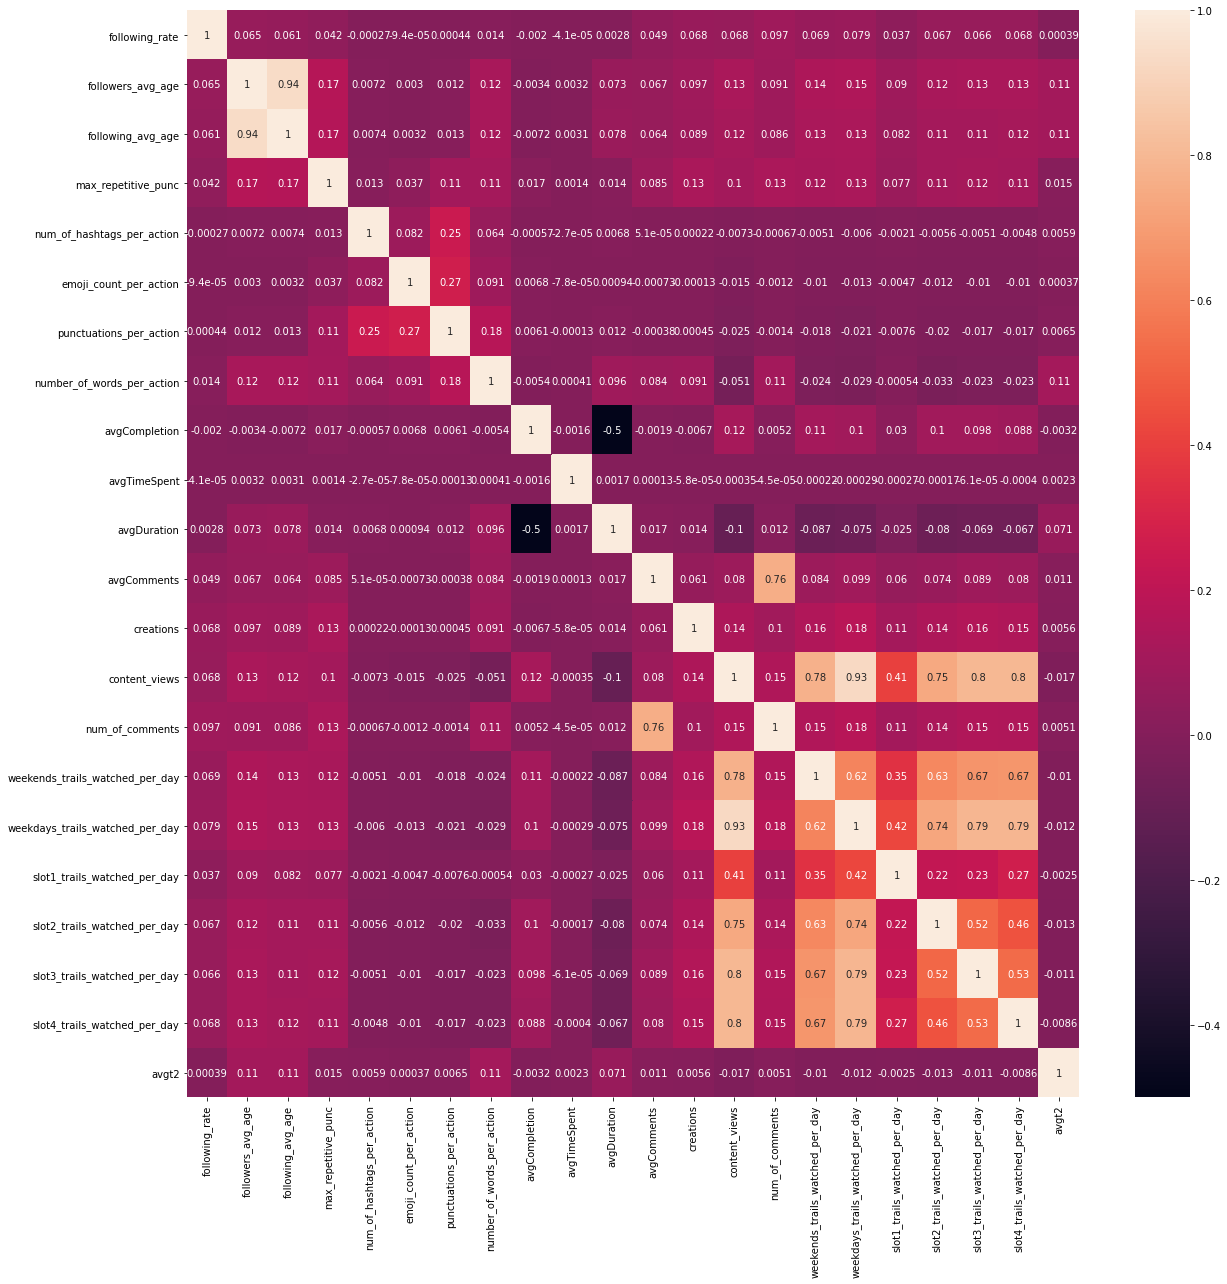

In [14]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [15]:
def pick_corr_val(cor_rel,thers):
    p_cor,n_cor,final_cor = [] , [], []
    for col in cor_rel:
        for row in cor_rel.index:
            if ((row,col) not in final_cor) and ((row,col) not in final_cor):
                if row == col:
                    pass
                else:
                    if cor_rel[row][col] >= thers :
                        val = cor_rel [row][col]
                        p_cor += [(row,col,val)]
                    elif cor_rel [row][col] <= -thers :
                        val = cor_rel [row][col]
                        n_cor += [(row,col,val)]
                    else:
                        pass
                final_cor += [(row,col),(col,row)]
    p = pd.DataFrame(data = np.array(p_cor),columns = ['row','column','positive correlation'])
    n = pd.DataFrame(data = np.array(n_cor),columns = ['row','column','negative correlation'])
    return p,n
positive_cor , negative_cor = pick_corr_val(corr,0.5)

In [16]:
positive_cor

,row,column,positive correlation
0,following_avg_age,followers_avg_age,0.9396388917354627
1,num_of_comments,avgComments,0.7619040569381601
2,weekends_trails_watched_per_day,content_views,0.7766766416375808
3,weekdays_trails_watched_per_day,content_views,0.9275480634475954
4,slot2_trails_watched_per_day,content_views,0.7472930535899588
5,slot3_trails_watched_per_day,content_views,0.7958924268776586
6,slot4_trails_watched_per_day,content_views,0.7951807026902926
7,weekdays_trails_watched_per_day,weekends_trails_watched_per_day,0.6160951932295311
8,slot2_trails_watched_per_day,weekends_trails_watched_per_day,0.6281884323296141
9,slot3_trails_watched_per_day,weekends_trails_watched_per_day,0.6691777164638595


In [17]:
negative_cor

,row,column,negative correlation
0,avgDuration,avgCompletion,-0.5004012157190335


extra tree classifier

In [18]:
x = df.drop('age_group',axis = 1)
y = df['age_group']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [20]:
imp_features = model.feature_importances_

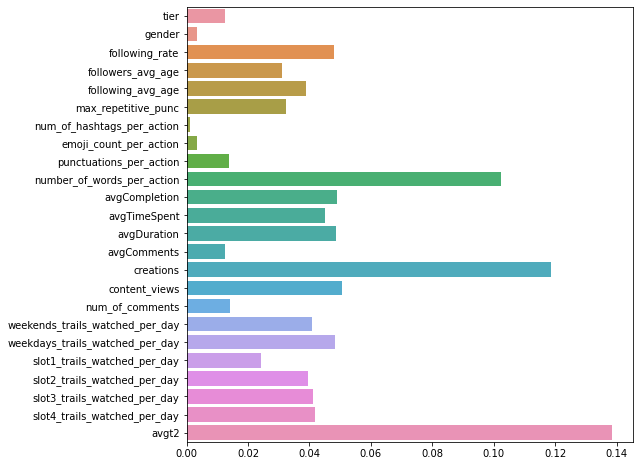

In [21]:
fig = plt.figure(figsize = (8,8))
sns.barplot(x = imp_features, y = df.columns[:24])

In [22]:
x=pd.get_dummies(data.drop(['age_group','num_of_hashtags_per_action',
                            'emoji_count_per_action','punctuations_per_action'
                            ,'followers_avg_age','weekdays_trails_watched_per_day'],axis = 1),drop_first=True)
y=data['age_group']

In [23]:
obj_col = df[['gender','tier','age_group']]
num_col = df.drop(obj_col.columns,axis = 1)

# Visualization

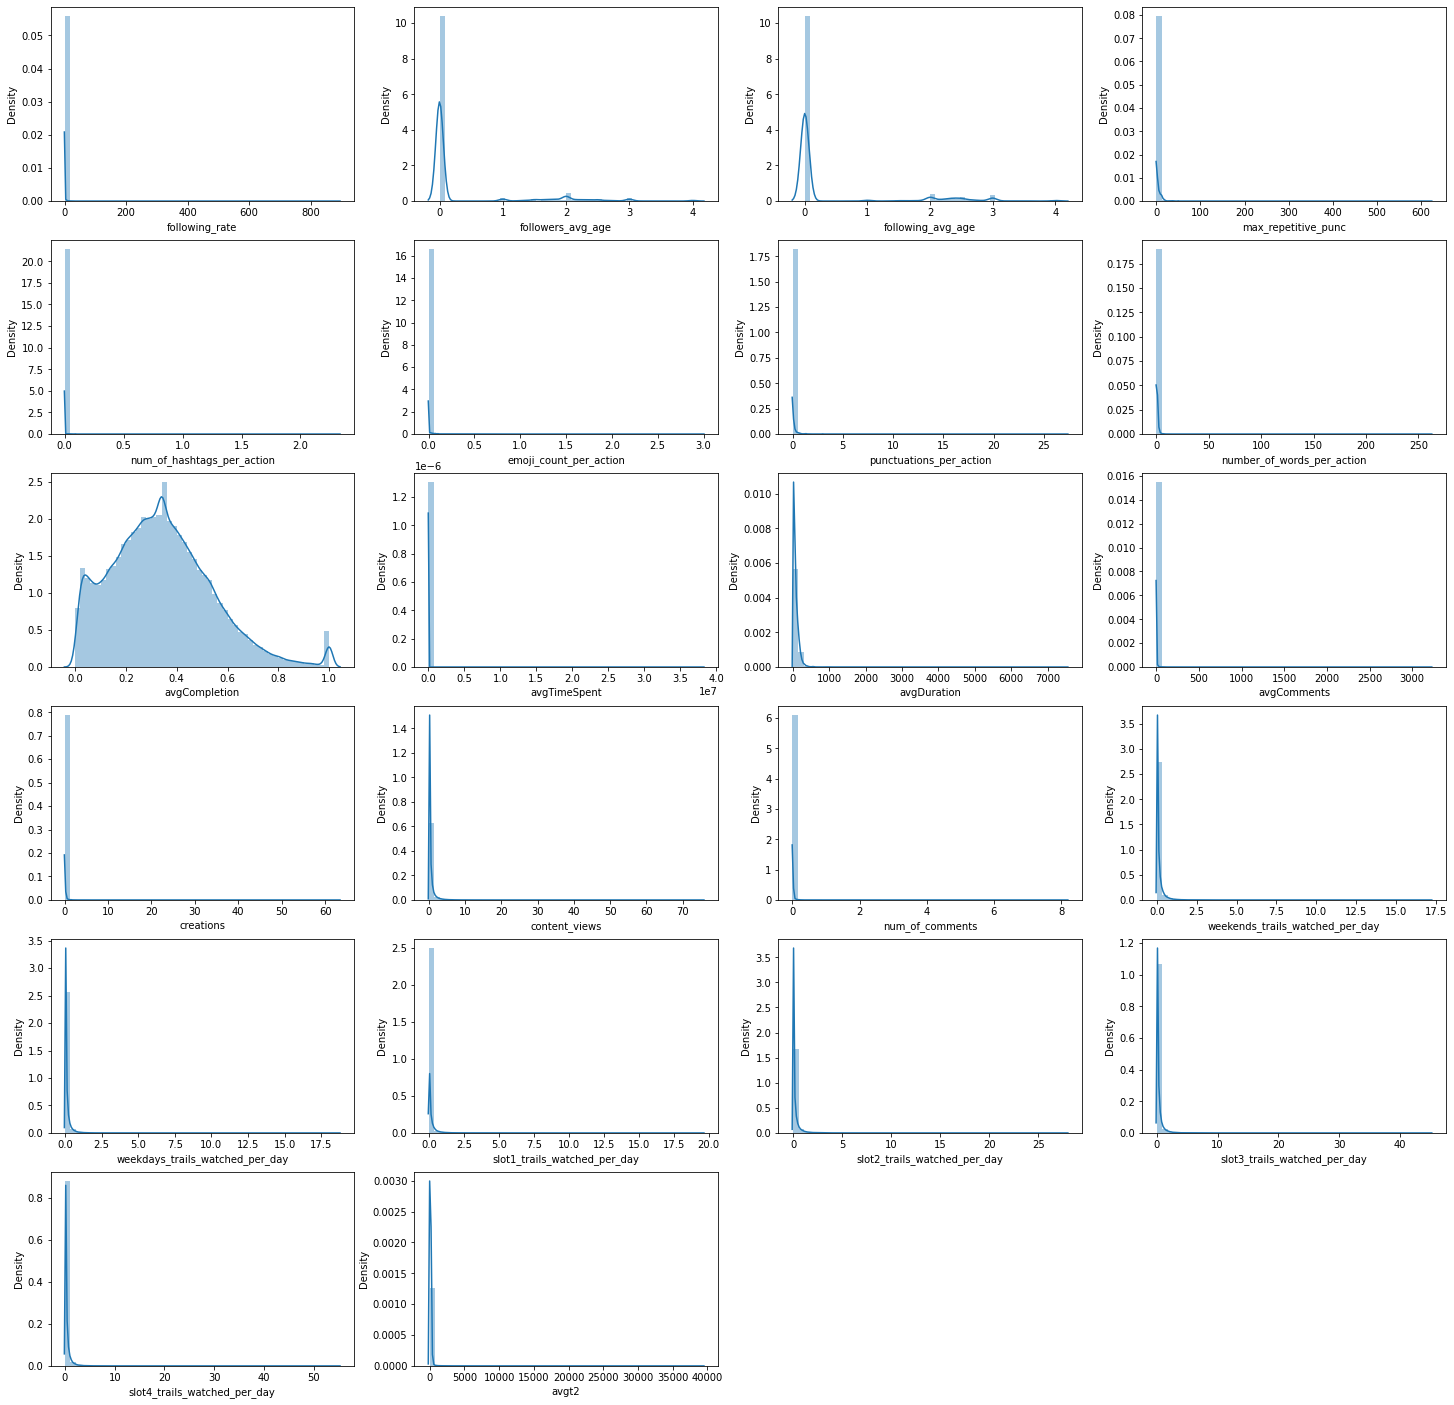

In [29]:
fig = plt.figure(figsize=(25,25))
for i,j in zip(range(1,len(num_col)+1),num_col.columns):
    ax = fig.add_subplot(6,4,i)
    sns.distplot(num_col[j],ax=ax)
plt.show()

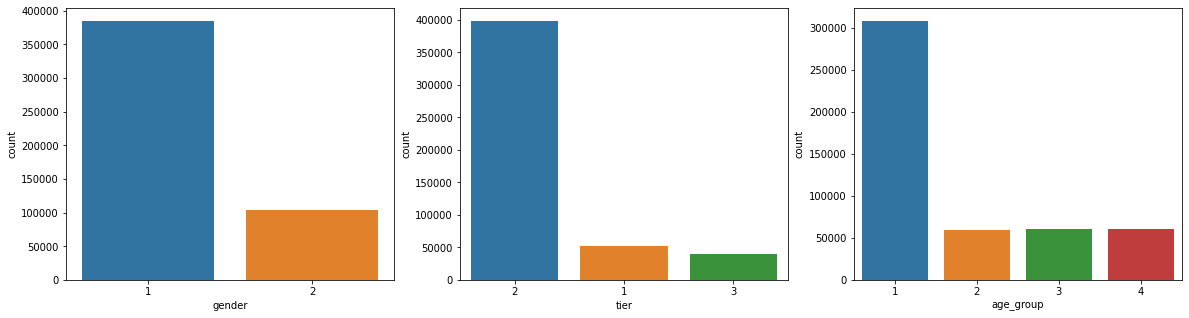

In [31]:
fig = plt.figure(figsize=(20,5))
for i,j in zip(range(1,len(obj_col)+1),obj_col.columns):
    ax = fig.add_subplot(1,3,i)
    sns.countplot(obj_col[j],ax=ax)
plt.show()

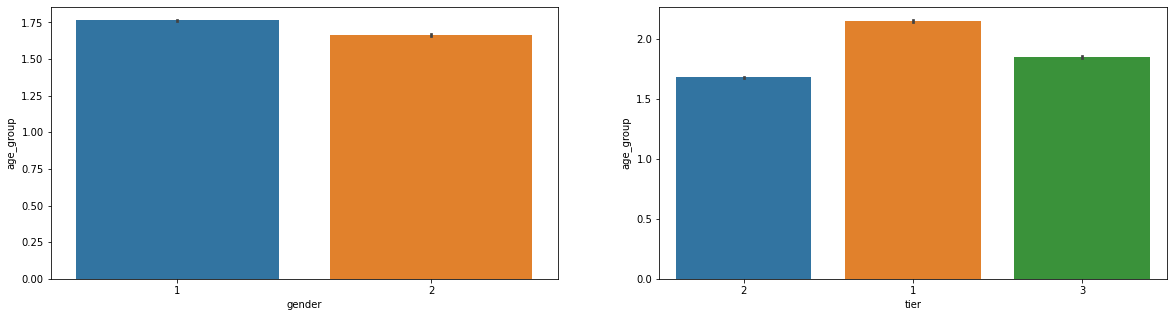

In [32]:
fig = plt.figure(figsize=(20,5))
for i,j in zip(range(1,len(obj_col)),obj_col.columns[:2]):
    ax = fig.add_subplot(1,2,i)
    sns.barplot(obj_col[j],obj_col['age_group'].astype('int'),ax=ax)
plt.show()

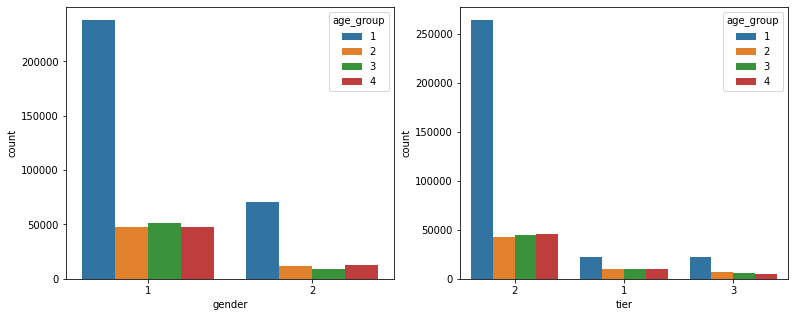

In [34]:
fig = plt.figure(figsize=(20,5))
for i,j in zip(range(1,len(obj_col)),obj_col.columns[:2]):
    ax = fig.add_subplot(1,3,i)
    sns.countplot(obj_col[j],hue = obj_col['age_group'],ax=ax)
plt.show()

In [42]:
def scatterplot(x,y,data):
    color = ['p','r','g','b','y']
    targets = [1,2,3,4]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for target in targets:
        plt.grid(True)
        sns.regplot(data[data['age_group'] == target][x].head(10000),
                    data[data['age_group'] == target][y].head(10000),
                    fit_reg=False,scatter_kws={"color": color[target]})
    plt.show()

# Over Sampling 

In [46]:
from imblearn.over_sampling import RandomOverSampler
oversam =  RandomOverSampler()
x_over, y_over = oversam.fit_sample(x, y)
x_over.shape,y_over.shape

((1233260, 22), (1233260,))

In [ ]:
df = pd.DataFrame(x_over,columns=x.columns)
df['age_group'] = y_over

In [ ]:
x = df.drop(['age_group'],axis = 1)
y = df['age_group']

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
rf=RandomForestClassifier()
model = rf.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))

[[25946  2275  1460  1334]
 [    4 30921    28    37]
 [    5    85 30579    50]
 [    7    39    64 30492]]


In [ ]:
accuracy_score(y_test,y_pred)

0.9563109157841818

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90     30889
           2       0.94      1.00      0.97     30840
           3       0.94      1.00      0.97     30663
           4       0.94      0.99      0.97     30934

    accuracy                           0.95    123326
   macro avg       0.95      0.95      0.95    123326
weighted avg       0.95      0.95      0.95    123326



# test file

In [ ]:
final_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/cascade/test_age_dataset.csv')

In [ ]:
def go_and_test(dataset,m):
    dataset["tier"]=dataset["tier"].astype(str)
    dataset["gender"]=dataset["gender"].astype(str)
    dataset = dataset.drop(['Unnamed: 0', 'userId','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action'
                        'followers_avg_age','weekdays_trails_watched_per_day'],axis = 1)
    dataset = pd.get_dummies(data = dataset,drop_first=True)
    predictions = m.predict(dataset)
    res = pd.DataFrame(data = predictions,columns = ['prediction'])
    res.to_csv('/content/gdrive/My Drive/Colab Notebooks/cascade/prediction_results.csv')
    print('file saved :)')

In [ ]:
go_and_test(final_test,model)

file saved :)
